In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Importing dataset**

In [2]:
df=pd.read_csv("Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [43]:
df.info

<bound method DataFrame.info of    Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes>

In [44]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [45]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

**Step 3: Handling the missing data**

In [3]:
a=df["Age"].median()
b=df["Salary"].mean()
print(a,  b)

38.0 63777.77777777778


In [4]:
df["Age"].fillna(value=a,inplace=True)
df["Salary"].fillna(value=63780,inplace=True)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63780.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 4: Encoding categorical data**

In [5]:
df['Purchased']=df['Purchased'].map({'Yes':1,'No':0})
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,63780.0,1
5,France,35.0,58000.0,1
6,Spain,38.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


**Step 5: Creating a dummy variable**

In [6]:
dummy_variable=pd.get_dummies(df.Country)
dummy_variable

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [7]:
merger=pd.concat([df,dummy_variable],axis='columns')
merger

,Country,Age,Salary,Purchased,France,Germany,Spain
0,France,44.0,72000.0,0,1,0,0
1,Spain,27.0,48000.0,1,0,0,1
2,Germany,30.0,54000.0,0,0,1,0
3,Spain,38.0,61000.0,0,0,0,1
4,Germany,40.0,63780.0,1,0,1,0
5,France,35.0,58000.0,1,1,0,0
6,Spain,38.0,52000.0,0,0,0,1
7,France,48.0,79000.0,1,1,0,0
8,Germany,50.0,83000.0,0,0,1,0
9,France,37.0,67000.0,1,1,0,0


In [8]:
f=merger.drop(['Country'],axis='columns')
f

,Age,Salary,Purchased,France,Germany,Spain
0,44.0,72000.0,0,1,0,0
1,27.0,48000.0,1,0,0,1
2,30.0,54000.0,0,0,1,0
3,38.0,61000.0,0,0,0,1
4,40.0,63780.0,1,0,1,0
5,35.0,58000.0,1,1,0,0
6,38.0,52000.0,0,0,0,1
7,48.0,79000.0,1,1,0,0
8,50.0,83000.0,0,0,1,0
9,37.0,67000.0,1,1,0,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [9]:
from sklearn.model_selection import train_test_split
X=f[['Age','Salary','France','Germany','Spain']].values
y=f['Purchased'].values

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)
print(X_train)
y_train

[[3.7e+01 6.7e+04 1.0e+00 0.0e+00 0.0e+00]
 [2.7e+01 4.8e+04 0.0e+00 0.0e+00 1.0e+00]
 [3.8e+01 5.2e+04 0.0e+00 0.0e+00 1.0e+00]
 [4.8e+01 7.9e+04 1.0e+00 0.0e+00 0.0e+00]
 [3.8e+01 6.1e+04 0.0e+00 0.0e+00 1.0e+00]
 [4.4e+01 7.2e+04 1.0e+00 0.0e+00 0.0e+00]
 [3.5e+01 5.8e+04 1.0e+00 0.0e+00 0.0e+00]]


array([1, 1, 0, 1, 0, 0, 1])

**Step 7: Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
X_train

array([[-0.18509793,  0.44897083,  0.8660254 ,  0.        , -0.8660254 ],
       [-1.80470477, -1.41706417, -1.15470054,  0.        ,  1.15470054],
       [-0.02313724, -1.0242147 , -1.15470054,  0.        ,  1.15470054],
       [ 1.59646961,  1.62751925,  0.8660254 ,  0.        , -0.8660254 ],
       [-0.02313724, -0.14030338, -1.15470054,  0.        ,  1.15470054],
       [ 0.94862687,  0.94003267,  0.8660254 ,  0.        , -0.8660254 ],
       [-0.50901929, -0.43494049,  0.8660254 ,  0.        , -0.8660254 ]])

In [14]:
X_test

array([[-1.31882272, -0.82778996, -1.15470054,  1.        , -0.8660254 ],
       [ 1.92039098,  2.02036872, -1.15470054,  1.        , -0.8660254 ],
       [ 0.30078413,  0.132727  , -1.15470054,  1.        , -0.8660254 ]])

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred=logistic_regression.predict(X_test)
logistic_regression.predict_proba(X_test)

array([[0.25405349, 0.74594651],
       [0.74776742, 0.25223258],
       [0.50175709, 0.49824291]])

In [24]:
logistic_regression.coef_

array([[-0.6722139 ,  0.00477326,  0.48253822,  0.        , -0.48253822]])

In [21]:
logistic_regression.intercept_

array([0.33382612])

<Axes: xlabel='Predicted', ylabel='Actual'>

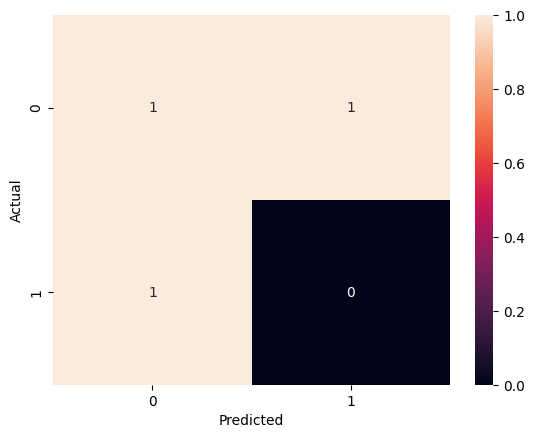

In [30]:
from sklearn.metrics import  roc_curve, roc_auc_score, confusion_matrix, f1_score

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
